In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [4]:
columns = ["Sample code number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"]
data = pd.read_csv("D:/MachineLearningCourse/Datasets/cancer.csv",names=columns,header=None)
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.drop(["Sample code number"],inplace=True,axis=1)
data = data.replace("?",0)
data["Bare Nuclei"] = data["Bare Nuclei"].astype(int)

In [6]:
X = data.iloc[:,:9]
y = data.iloc[:,9]
y = np.where(y==2,0,1)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
def evaluate(clf,name):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(name)
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    print("Precision Score : ",precision_score(y_test,y_pred))
    print("Recall Score : ",recall_score(y_test,y_pred))    
    print("F1 Score : ",f1_score(y_test,y_pred)) 
    print("Cross val Score : ",cross_val_score(clf,X_test,y_test,cv=10).mean())
    print("-----"*10)

In [10]:
lr = LogisticRegression()
cart = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier()

evaluate(lr,"Logistic Regression")
evaluate(cart,"Decision Tree")
evaluate(svc,"SVC")
evaluate(knn,"KNN")

Logistic Regression
Accuracy Score :  0.9666666666666667
Precision Score :  0.96875
Recall Score :  0.9253731343283582
F1 Score :  0.9465648854961832
Cross val Score :  0.9619047619047618
--------------------------------------------------
Decision Tree
Accuracy Score :  0.9523809523809523
Precision Score :  0.9384615384615385
Recall Score :  0.9104477611940298
F1 Score :  0.9242424242424243
Cross val Score :  0.9238095238095237
--------------------------------------------------
SVC
Accuracy Score :  0.9761904761904762
Precision Score :  0.9696969696969697
Recall Score :  0.9552238805970149
F1 Score :  0.9624060150375939
Cross val Score :  0.9619047619047618
--------------------------------------------------
KNN
Accuracy Score :  0.9666666666666667
Precision Score :  0.96875
Recall Score :  0.9253731343283582
F1 Score :  0.9465648854961832
Cross val Score :  0.9619047619047618
--------------------------------------------------


In [11]:
tree = DecisionTreeClassifier()
model = BaggingClassifier(tree,n_estimators=100)
model.fit(X_train,y_train)
evaluate(model,"Bagging Classifier")

Bagging Classifier
Accuracy Score :  0.9666666666666667
Precision Score :  0.9545454545454546
Recall Score :  0.9402985074626866
F1 Score :  0.9473684210526316
Cross val Score :  0.9571428571428571
--------------------------------------------------


In [12]:
estimators = []

lr = LogisticRegression()
estimators.append(("Logistic",lr))
tree = DecisionTreeClassifier()
estimators.append(("Decision",tree))
knn = KNeighborsClassifier()
estimators.append(("knn",knn))
svc = SVC()
estimators.append(("svc",svc))

voting = VotingClassifier(estimators)
evaluate(voting,"Voting Classifier")

Voting Classifier
Accuracy Score :  0.9761904761904762
Precision Score :  0.9696969696969697
Recall Score :  0.9552238805970149
F1 Score :  0.9624060150375939
Cross val Score :  0.9619047619047618
--------------------------------------------------


In [13]:
tree = DecisionTreeClassifier(max_depth=2)
adaboost = AdaBoostClassifier(tree,n_estimators=100)
evaluate(adaboost,"AdaBoost Classifier")

AdaBoost Classifier
Accuracy Score :  0.9714285714285714
Precision Score :  0.9692307692307692
Recall Score :  0.9402985074626866
F1 Score :  0.9545454545454547
Cross val Score :  0.9714285714285713
--------------------------------------------------


In [14]:
gradient_boost = GradientBoostingClassifier()
evaluate(gradient_boost,"GradientBoosting Classifier")

GradientBoosting Classifier
Accuracy Score :  0.9666666666666667
Precision Score :  0.9545454545454546
Recall Score :  0.9402985074626866
F1 Score :  0.9473684210526316
Cross val Score :  0.9666666666666666
--------------------------------------------------


In [15]:
rfc = RandomForestClassifier(n_estimators=200,max_depth=2)
evaluate(rfc,"RandomForest Classifier")

RandomForest Classifier
Accuracy Score :  0.9809523809523809
Precision Score :  0.9436619718309859
Recall Score :  1.0
F1 Score :  0.9710144927536231
Cross val Score :  0.9619047619047618
--------------------------------------------------


In [16]:
def evaluate_pca(clf,name):
    clf.fit(X_train_pca,y_train)
    y_pred = clf.predict(X_test_pca)
    print(name)
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    print("Precision Score : ",precision_score(y_test,y_pred))
    print("Recall Score : ",recall_score(y_test,y_pred))    
    print("F1 Score : ",f1_score(y_test,y_pred)) 
    print("Cross val Score : ",cross_val_score(clf,X_test,y_test,cv=10).mean())
    print("-----"*10)

In [17]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [19]:
lr = LogisticRegression()
cart = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier()

evaluate_pca(lr,"Logistic Regression")
evaluate_pca(cart,"Decision Tree")
evaluate_pca(svc,"SVC")
evaluate_pca(knn,"KNN")

Logistic Regression
Accuracy Score :  0.9666666666666667
Precision Score :  0.9411764705882353
Recall Score :  0.9552238805970149
F1 Score :  0.9481481481481482
Cross val Score :  0.9619047619047618
--------------------------------------------------
Decision Tree
Accuracy Score :  0.9619047619047619
Precision Score :  0.9682539682539683
Recall Score :  0.9104477611940298
F1 Score :  0.9384615384615386
Cross val Score :  0.919047619047619
--------------------------------------------------
SVC
Accuracy Score :  0.9714285714285714
Precision Score :  0.9420289855072463
Recall Score :  0.9701492537313433
F1 Score :  0.9558823529411764
Cross val Score :  0.9619047619047618
--------------------------------------------------
KNN
Accuracy Score :  0.9666666666666667
Precision Score :  0.9411764705882353
Recall Score :  0.9552238805970149
F1 Score :  0.9481481481481482
Cross val Score :  0.9619047619047618
--------------------------------------------------


In [20]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_pca,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
centroids = kmeans.cluster_centers_

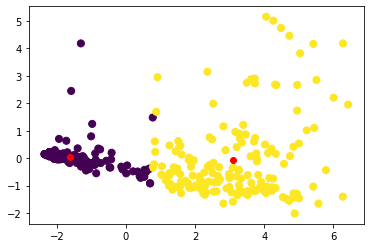

In [22]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=kmeans.labels_.astype("float"),s=50)
plt.scatter(centroids[:,0],centroids[:,1],c="r")

In [23]:
grid_params = {'criterion':["gini","entropy"],'max_depth':np.arange(5,50)}

tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree,grid_params,cv=10)

In [24]:
evaluate(grid_search,"GridSearchCV")

GridSearchCV
Accuracy Score :  0.9333333333333333
Precision Score :  0.9076923076923077
Recall Score :  0.8805970149253731
F1 Score :  0.8939393939393939
Cross val Score :  0.9523809523809523
--------------------------------------------------


In [25]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 41}